In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# model building
# using keras
import tensorflow as tf
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, BatchNormalization, Layer
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam


In [2]:
dataset, dataset_info = tfds.load('malaria',
                                  shuffle_files=True,
                                  with_info=True,
                                  split=['train'],
                                  as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteU9PJNY/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

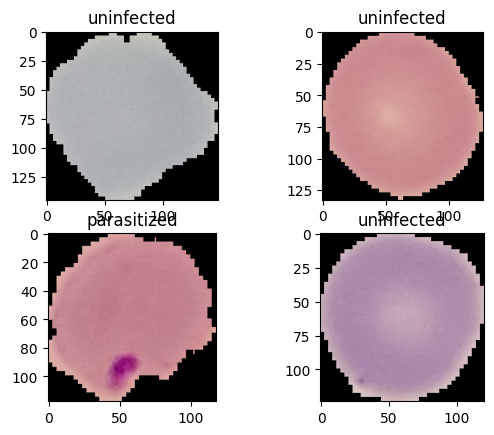

In [4]:
i = 0
for data in dataset[0].take(4):
    plt.subplot(2,2,i+1)
    plt.imshow(data[0])
    plt.title(f"{dataset_info.features['label'].int2str(data[1])}")
    i += 1

In [5]:
IM_SIZE = 224
def resizing_and_norm(image,label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0,label

In [6]:
resized_dataset = dataset[0].map(resizing_and_norm)

In [7]:
for data in resized_dataset.take(4):
    print(data[1])

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [8]:
# splitting the dataset

def train_test_split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    # dataset = tf.data.Dataset.range(10)
    # print(list(dataset.as_numpy_iterator()))

    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
    # print(list(train_dataset.as_numpy_iterator()))

    intermed = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))

    val_dataset = intermed.take(int(VAL_RATIO*DATASET_SIZE))
    # print(list(val_dataset.as_numpy_iterator()))

    test_dataset = intermed.skip(int(VAL_RATIO*DATASET_SIZE))
    # print(list(test_dataset.as_numpy_iterator()))

    return train_dataset, val_dataset, test_dataset

In [9]:
train, val, test = train_test_split(resized_dataset, 0.7, 0.2, 0.1)

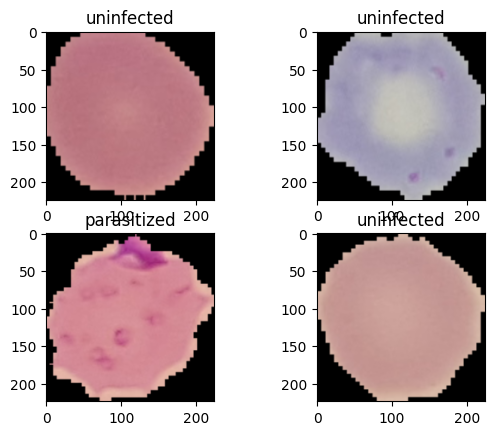

In [10]:
# training examples

for index, i in enumerate(train.take(4)):
    plt.subplot(2,2,index+1)
    plt.imshow(i[0])
    plt.title(f"{dataset_info.features['label'].int2str(i[1])}")

In [11]:
BATCH_SIZE = 32
train = train.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [12]:
val = val.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
lenet_model_v2 = Sequential()

lenet_model_v2.add(Input((IM_SIZE, IM_SIZE,3)))
lenet_model_v2.add(Conv2D(16,3,strides=1,padding='valid',activation='relu'))
lenet_model_v2.add(MaxPool2D(pool_size=(2,2), strides = 2)),
lenet_model_v2.add(BatchNormalization()),

lenet_model_v2.add(Conv2D(8,3,strides=1,padding='valid',activation='relu'))
lenet_model_v2.add(MaxPool2D(pool_size=(2,2), strides = 2)),
lenet_model_v2.add(BatchNormalization()),

lenet_model_v2.add(Flatten())

lenet_model_v2.add(Dense(100, activation='relu')),
lenet_model_v2.add(BatchNormalization()),
lenet_model_v2.add(Dense(10, activation='relu')),
lenet_model_v2.add(BatchNormalization()),
lenet_model_v2.add(Dense(1, activation='sigmoid'))

lenet_model_v2.summary()

In [19]:
# Functional API
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3))

x = Conv2D(filters=16,kernel_size = 3,strides=1,padding='valid',activation='relu')(func_input)
x = MaxPool2D(pool_size=(2,2),strides = 2)(x)
x = BatchNormalization()(x)

x = Conv2D(filters=16,kernel_size = 3,strides=1,padding='valid',activation='relu')(x)
x = MaxPool2D(pool_size=(2,2),strides = 2)(x)
x = BatchNormalization()(x)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)

lenet_model_v3 = Model(func_input, func_output)
lenet_model_v3.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 111, 111, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 16)       0     

In [21]:
# Functional API
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3))

x = Conv2D(filters=16,kernel_size = 3,strides=1,padding='valid',activation='relu')(func_input)
x = MaxPool2D(pool_size=(2,2),strides = 2)(x)
x = BatchNormalization()(x)

x = Conv2D(filters=16,kernel_size = 3,strides=1,padding='valid',activation='relu')(x)
x = MaxPool2D(pool_size=(2,2),strides = 2)(x)
feature_output = BatchNormalization()(x)

lenet_model_v4 = Model(func_input, feature_output)
lenet_model_v4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 111, 111, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 16)       0   

In [24]:
# Functional API
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3))

x = lenet_model_v4(func_input)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)

lenet_model_v4_2 = Model(func_input, func_output)
lenet_model_v4_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 model_2 (Functional)        (None, 54, 54, 16)        2896      
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_7 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_11 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                           

In [26]:
# Mixing functional and sequential
# creating the feature extractor using sequential way
lenet_model_v5_seq = Sequential()

lenet_model_v5_seq.add(Input((IM_SIZE, IM_SIZE,3)))
lenet_model_v5_seq.add(Conv2D(16,3,strides=1,padding='valid',activation='relu'))
lenet_model_v5_seq.add(MaxPool2D(pool_size=(2,2), strides = 2)),
lenet_model_v5_seq.add(BatchNormalization()),

lenet_model_v5_seq.add(Conv2D(16,3,strides=1,padding='valid',activation='relu'))
lenet_model_v5_seq.add(MaxPool2D(pool_size=(2,2), strides = 2)),
lenet_model_v5_seq.add(BatchNormalization())

lenet_model_v5_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_15 (Bat  (None, 111, 111, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                      

In [27]:
# now create the rest of the part with funcitonal api
func_input = Input((IM_SIZE, IM_SIZE, 3))

x = lenet_model_v5_seq(func_input)
x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation='relu')(x)
output = BatchNormalization()(x)

final_model  = Model(func_input, output)
final_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 54, 54, 16)        2896      
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_10 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_17 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                           

### Model Subclassing
- It's a method to make a custom recipie for your machine learning model. It's a bit of work more but it gives you a lot of flexibility and a way to create your own dish or help you to make a dish for special occasion that other already present receipe won't help

In [33]:
class FeatureExtractor(Layer):
    def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
        super(FeatureExtractor, self).__init__()
        
        # attributes are the layers
        self.conv_1 = Conv2D(filters=filters,kernel_size = kernel_size,
                             strides=strides,padding=padding,activation=activation)
        self.pool_1 = MaxPool2D(pool_size=pool_size,strides = 2 *  strides)
        self.batch_1 = BatchNormalization()

        self.conv_2 = Conv2D(filters=filters*2,kernel_size = kernel_size,
                             strides=strides,padding=padding,activation=activation)
        self.pool_2 = MaxPool2D(pool_size=pool_size,strides = 2 * strides)
        self.batch_2 = BatchNormalization()
        
    def call(self, x):
        
        x = self.conv_1(x)
        x = self.pool_1(x)
        x = self.batch_1(x)
        
        x = self.conv_2(x)
        x = self.pool_2(x)
        x = self.batch_2(x)
        
        return x
    
feature_from_sub_class = FeatureExtractor(
filters=8, kernel_size=3, strides=1, padding="valid", activation='relu', pool_size=(2,2)
)    

In [34]:
input  = Input((IM_SIZE, IM_SIZE, 3))

x = feature_from_sub_class(input)
x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation='relu')(x)
output = BatchNormalization()(x)

final_model  = Model(input, output)
final_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (FeatureE  (None, 54, 54, 16)       1488      
 xtractor)                                                       
                                                                 
 flatten_4 (Flatten)         (None, 46656)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_21 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 10)                1010

In [ ]:

lenet_model_v2.compile(
    optimizer=Adam(learning_rate=0.01),
    loss= BinaryCrossentropy(),
    metrics='accuracy'
)

In [ ]:
lenet_model_v2.fit(
    train,
    validation_data = val,
    batch_size = 32,
    epochs = 7,
    verbose = True
)

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Model Loss")
plt.plot(lenet_model_v2.history.history['loss'], label = 'train')
plt.plot(lenet_model_v2.history.history['val_loss'], label = 'val')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Model Accuracy")
plt.plot(lenet_model_v2.history.history['accuracy'], label = 'train')
plt.plot(lenet_model_v2.history.history['val_accuracy'], label = 'val')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.tight_layout()

In [ ]:
test = test.batch(1)
test


In [ ]:
test

In [ ]:
lenet_model_v2.evaluate(test)

In [ ]:
lenet_model_v2.save('malaria_model_config1.h5')
lenet_model_v2.save_weights('malaria_model_weights1.h5')